<a href="https://colab.research.google.com/github/Romanchenko-RS/ML/blob/main/%D0%A0%D0%B0%D0%B1%D0%BE%D1%82%D0%B0_%D1%81_%D0%BF%D0%B5%D1%80%D0%B5%D0%BC%D0%B5%D0%BD%D0%BD%D1%8B%D0%BC%D0%B8_%D0%A0%D0%BE%D0%BC%D0%B0%D0%BD%D1%87%D0%B5%D0%BD%D0%BA%D0%BE_%D0%A0_%D0%A1_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1.Получите данные и загрузите их в рабочую среду.**

In [ ]:
from sklearn.datasets import fetch_california_housing
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from math import sqrt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = fetch_california_housing()
print(fetch_california_housing().DESCR)  # Получим информацию о датасете

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [ ]:
# Переведём датасет во фрейм и сразу назовём его X
X = pd.DataFrame(df.data, columns=df.feature_names)
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [ ]:
# Посмотрим на количество уникальных значений во фрейме
X.nunique()

MedInc        12928
HouseAge         52
AveRooms      19392
AveBedrms     14233
Population     3888
AveOccup      18841
Latitude        862
Longitude       844
dtype: int64

In [ ]:
# Статистика по всем столбцам
X.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


Сразу можем заметить странное максимальное значение для переменных AveRooms и AveBedrms.

**2. Проверьте данные на наличие пропусков. Удалите их в случае обнаружения.**

In [ ]:
X.isna().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
dtype: int64

Как видно, пропусков в данных нет.

В анализ возьмём все атрибуты, т.к. они все являются важными для предсказания цены.

In [ ]:
y = pd.DataFrame(df.target, columns=df.target_names)
y.head()

,MedHouseVal
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422


**3. Разделите выборку на обучающее и тестовое подмножества. 80% данных оставить на обучающее множество, 20% - на тестовое.**

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**4. Постройте модель линейной регрессии. Вычислите метрики RMSE, R2 на обучающем и тестовом множестве.**

In [ ]:
model = LinearRegression()

model.fit(x_train, y_train)

train_predictions = model.predict(x_train)
test_predictions = model.predict(x_test)

rmse_train = np.sqrt(mean_squared_error(y_train, train_predictions))
rmse_test = np.sqrt(mean_squared_error(y_test, test_predictions))

train_R2 = r2_score(y_train, train_predictions)
test_R2 = r2_score(y_test, test_predictions)

print(f"RMSE на обучающей выборке: {rmse_train:.4f}")
print(f"RMSE на тестовой выборке: {rmse_test:.4f}")

print(f"R2 на обучающей выборке: {train_R2:.4f}")
print(f"R2 на тестовой выборке: {test_R2:.4f}")

RMSE на обучающей выборке: 0.7197
RMSE на тестовой выборке: 0.7456
R2 на обучающей выборке: 0.6126
R2 на тестовой выборке: 0.5758


In [ ]:
# Создание словаря для записи результатов
results = pd.DataFrame(columns=['Вариант датафрейма', 'rmse_train', 'rmse_test', 'train_R2', 'test_R2'])

In [ ]:
# Запишем результат в словарь
results.loc[len(results)] = ['Исходная модель', rmse_train, rmse_test, train_R2, test_R2]

**5. Постройте график распределения целевой переменной. Сделайте вывод.**

Для более детального понимания, с какими данными будем работать, выведем диаграммы по всем категориям

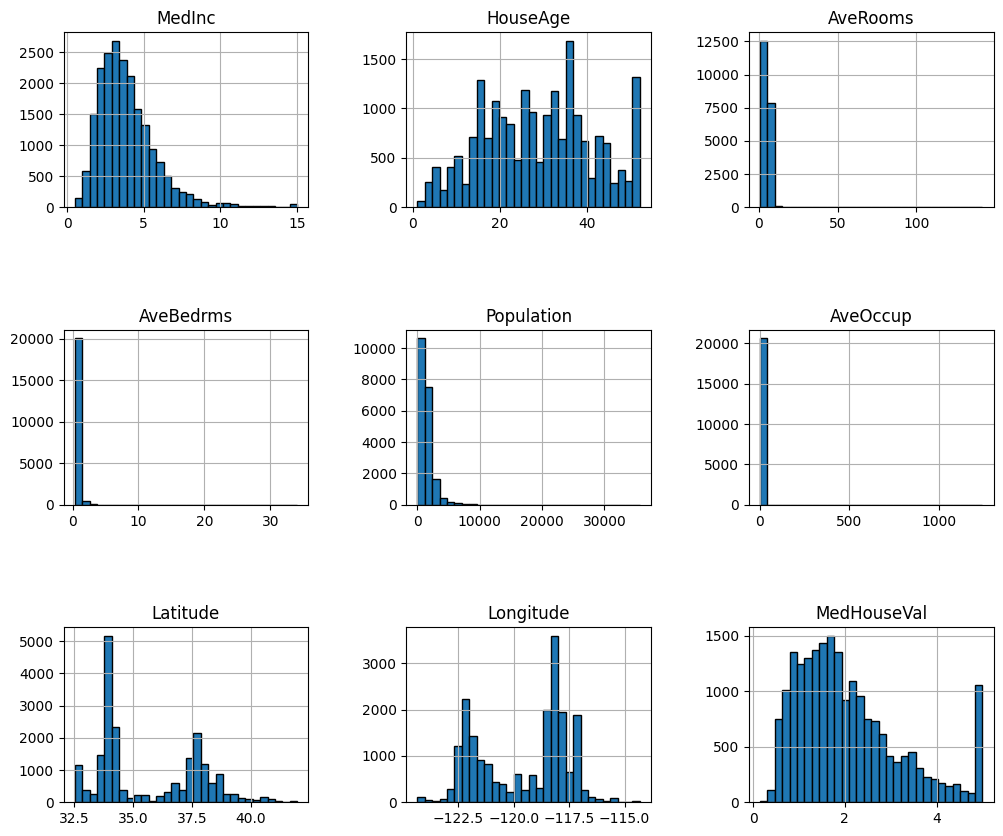

In [ ]:
california_housing = fetch_california_housing(as_frame=True)
california_housing.frame.hist(figsize=(12, 10), bins=30, edgecolor="black")
plt.subplots_adjust(hspace=0.7, wspace=0.4)

Анализируя диаграмму для целевой перменной, можем сделать вывод, что данные распределены вполне равномерно, однако у порогового значения 5 видим рост, что не соответствует тенденцию уменьшения количества от стоимости. Это можно объяснить тем, что всем значениям выше порога присваивается значение 5.

**6. Посчитайте и выведите корреляционную матрицу**

<Axes: >

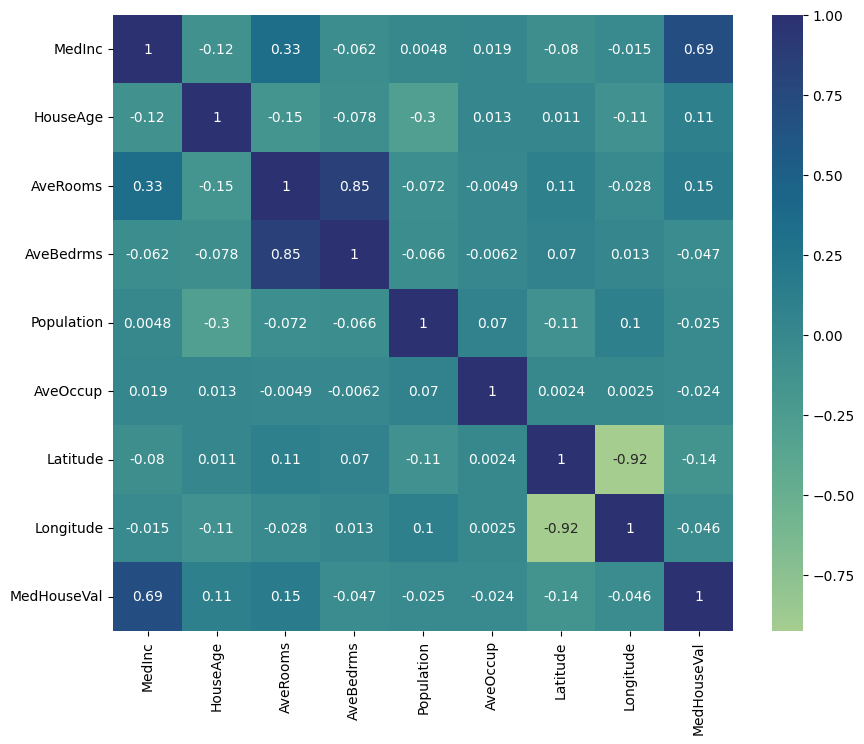

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(pd.concat([X,y], axis=1).corr(), cmap='crest',annot=True)

**a. Сделайте выводы.**

Согласно корреляционной матрице, три признака имеют наибольшую корреляцию с целевой переменной - "MedInc", "HouseAge" и "AveRooms". Построим модель только по этим данным.

**b. Удалите признаки на основании полученных значений, выводов.**

In [ ]:
X1 = X.iloc[:, [0,1,2]]
X1.head()

,MedInc,HouseAge,AveRooms
0,8.3252,41.0,6.984127
1,8.3014,21.0,6.238137
2,7.2574,52.0,8.288136
3,5.6431,52.0,5.817352
4,3.8462,52.0,6.281853


**c. Повторите п. 3, п. 4 на измененных данных.**

In [ ]:
x1_train, x1_test, y1_train, y1_test = train_test_split(X1, y, test_size=0.2, random_state=42)

In [ ]:
model1 = LinearRegression()

model1.fit(x1_train, y1_train)

train_predictions1 = model1.predict(x1_train)
test_predictions1 = model1.predict(x1_test)

rmse_train1 = np.sqrt(mean_squared_error(y1_train, train_predictions1))
rmse_test1 = np.sqrt(mean_squared_error(y1_test, test_predictions1))

train_R2_1 = r2_score(y1_train, train_predictions1)
test_R2_1 = r2_score(y1_test, test_predictions1)

print(f"RMSE на обучающей выборке: {rmse_train1:.4f}")
print(f"RMSE на тестовой выборке: {rmse_test1:.4f}")

print(f"R2 на обучающей выборке: {train_R2_1:.4f}")
print(f"R2 на тестовой выборке: {test_R2_1:.4f}")

RMSE на обучающей выборке: 0.8046
RMSE на тестовой выборке: 0.8117
R2 на обучающей выборке: 0.5157
R2 на тестовой выборке: 0.4972


In [ ]:
# Запишем результат в словарь
results.loc[len(results)] = ['Модель по корреляции', rmse_train1, rmse_test1, train_R2_1, test_R2_1]

**7. Исследуйте оставленные признаки на выбросы.**

**a. Удалите выбросы в случае обнаружения.**

<Axes: >

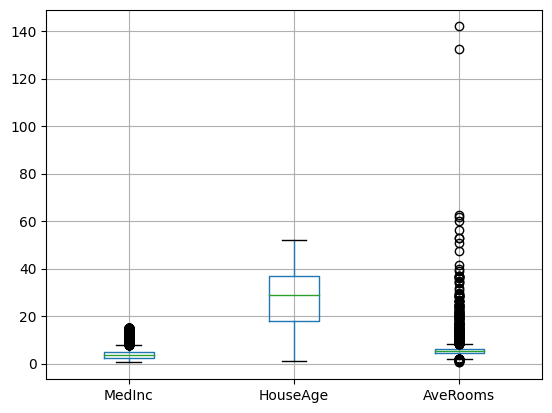

In [ ]:
X1.boxplot()

Можем заметить, что переменная AveRooms имеет 2 выброса. Проверим эти данные

In [ ]:
X1[X1['AveRooms'] > 100]

,MedInc,HouseAge,AveRooms
1914,1.875,33.0,141.909091
1979,4.625,34.0,132.533333


Удалим эти строки из таблицы с переменными и из таблицы с целевыми перменными по индексу (1914 и 1979)

In [ ]:
X2 = X1.drop(index=[1914, 1979])
y2 = y.drop(index=[1914, 1979])

Вернём порядок в нумерацию индексов

In [ ]:
X2 = X2.reset_index(drop=True)
y2 = y2.reset_index(drop=True)

Проверим данные на наличие выбросов

<Axes: >

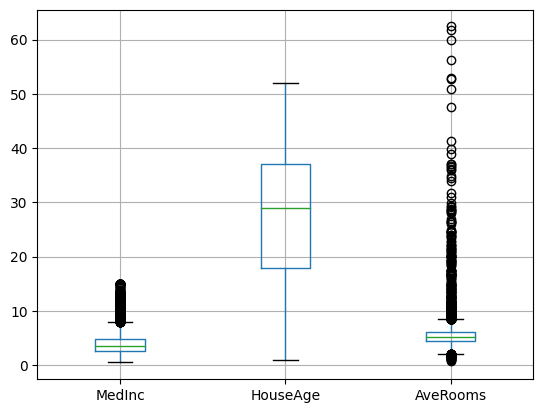

In [ ]:
X2.boxplot()

Как видим, выбросы отсутствуют, можем приступить к обучению модели

**b. Повторите п. 3, п. 4 на измененных данных.**

In [ ]:
x2_train, x2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

In [ ]:
model2 = LinearRegression()

model2.fit(x2_train, y2_train)

train_predictions2 = model2.predict(x2_train)
test_predictions2 = model2.predict(x2_test)

rmse_train2 = np.sqrt(mean_squared_error(y2_train, train_predictions2))
rmse_test2 = np.sqrt(mean_squared_error(y2_test, test_predictions2))

train_R2_2 = r2_score(y2_train, train_predictions2)
test_R2_2 = r2_score(y2_test, test_predictions2)

print(f"RMSE на обучающей выборке: {rmse_train2:.4f}")
print(f"RMSE на тестовой выборке: {rmse_test2:.4f}")

print(f"R2 на обучающей выборке: {train_R2_2:.4f}")
print(f"R2 на тестовой выборке: {test_R2_2:.4f}")

RMSE на обучающей выборке: 0.8035
RMSE на тестовой выборке: 0.8035
R2 на обучающей выборке: 0.5154
R2 на тестовой выборке: 0.5133


In [ ]:
# Запишем результат в словарь
results.loc[len(results)] = ['Модель по корреляции без выбросов', rmse_train2, rmse_test2, train_R2_2, test_R2_2]

**8. Измените несколько признаков на выбор математически.**

В качестве примера, возмём последний полученные датафрейм без выбросов и пролагорифмируем все переменные.

In [ ]:
X3 = X2.apply(lambda x: np.log(x), axis=0)
X3.head()

,MedInc,HouseAge,AveRooms
0,2.119287,3.713572,1.943640
1,2.116424,3.044522,1.830682
2,1.982022,3.951244,2.114825
3,1.730434,3.951244,1.760845
4,1.347086,3.951244,1.837665


**a. Повторите п. 3, п. 4 на измененных данных.**

In [ ]:
x3_train, x3_test, y3_train, y3_test = train_test_split(X3, y2, test_size=0.2, random_state=42)

In [ ]:
model3 = LinearRegression()

model3.fit(x3_train, y3_train)

train_predictions3 = model3.predict(x3_train)
test_predictions3 = model3.predict(x3_test)

rmse_train3 = np.sqrt(mean_squared_error(y3_train, train_predictions3))
rmse_test3 = np.sqrt(mean_squared_error(y3_test, test_predictions3))

train_R2_3 = r2_score(y3_train, train_predictions3)
test_R2_3 = r2_score(y3_test, test_predictions3)

print(f"RMSE на обучающей выборке: {rmse_train3:.4f}")
print(f"RMSE на тестовой выборке: {rmse_test3:.4f}")

print(f"R2 на обучающей выборке: {train_R2_3:.4f}")
print(f"R2 на тестовой выборке: {test_R2_3:.4f}")

RMSE на обучающей выборке: 0.8380
RMSE на тестовой выборке: 0.8401
R2 на обучающей выборке: 0.4729
R2 на тестовой выборке: 0.4680


In [ ]:
# Запишем результат в словарь
results.loc[len(results)] = ['Модель по корреляции без выбросов (log)', rmse_train3, rmse_test3, train_R2_3, test_R2_3]

**9. Сформулируйте выводы по проделанной работе.**

**a. Кратко опишите какие преобразования были сделаны с данными.**

В процессе выполнения работы были выполнены следующие преобразования:
1. Были выделены признаки, которые больше всего коррелируют с целевой переменной.

2. Было очищено 2 выброса в перменной "AveRooms".

3. Было применено логарифмирование ко всем переменным.

**b. Сравните метрики всех моделей.**

In [ ]:
results

,Вариант датафрейма,rmse_train,rmse_test,train_R2,test_R2
0,Исходная модель,0.719676,0.745581,0.612551,0.575788
1,Модель по корреляции,0.804591,0.811733,0.515726,0.497172
2,Модель по корреляции без выбросов,0.803504,0.803511,0.515426,0.513321
3,Модель по корреляции без выбросов (log),0.838015,0.840059,0.472905,0.468040


Как видно из сравнительной таблицы, rmse на обучающей и на тестовой выборках имеет наибольшее значение для модели по корреляции без выбросов, которая была преобразована логарифмированием.

R2 на обучающей и на тестовой выборках имеет наибольшее значение для исходной модели.

**c. Напишите свое мнение, в полной ли мере модели справились с поставленной задачей.**

На мой взгляд, модели справились с поставленной задачей не в полной мере. Отталкиваясь от ключевой метрики для линейной регрессии - коэффициент детерминации R2, можно заметить, что лучше всего отработала модель на исходных данных, учитывая все факторы датасета.

В процессе анализа было замечено, что при максимальном значении - 5 для целевой переменной наблюдается концентрация значений, что говорит о том, что данные в реальности имеют другое распределение, что также сказывается на качестве модели.

Для повышения качества её работы необходимо провести более детальный разбор исходных данных и применять различные варианты обработки информации.